In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [2]:
NVDA= yf.Ticker("NVDA")
NVDA

yfinance.Ticker object <NVDA>

In [3]:
NVDA_historical = NVDA.history(start="2023-06-02", end="2024-06-07", interval="1d")
NVDA_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-06-02 00:00:00-04:00,40.080851,40.483689,39.042268,39.311161,482731000,0.000,0.0
2023-06-05 00:00:00-04:00,38.893328,39.549062,38.691410,39.155224,396094000,0.000,0.0
2023-06-06 00:00:00-04:00,38.814363,39.144228,38.132635,38.638432,388729000,0.000,0.0
2023-06-07 00:00:00-04:00,38.903351,39.487176,37.344816,37.463779,511998000,0.004,0.0
2023-06-08 00:00:00-04:00,37.712710,38.852368,37.493778,38.498474,417772000,0.000,0.0
...,...,...,...,...,...,...,...
2024-05-31 00:00:00-04:00,112.510757,112.707747,106.931221,109.624001,613263000,0.000,0.0
2024-06-03 00:00:00-04:00,113.611670,114.990555,111.993799,114.990555,438392000,0.000,0.0
2024-06-04 00:00:00-04:00,115.706495,116.590418,114.035627,116.427429,403324000,0.000,0.0


In [4]:
df = pd.DataFrame(NVDA_historical)

In [5]:
df.drop('Dividends', axis = 1, inplace=True)

In [6]:
df.drop('Stock Splits', axis = 1, inplace=True)

In [7]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-06-02 00:00:00-04:00,40.080851,40.483689,39.042268,39.311161,482731000
2023-06-05 00:00:00-04:00,38.893328,39.549062,38.691410,39.155224,396094000
2023-06-06 00:00:00-04:00,38.814363,39.144228,38.132635,38.638432,388729000
2023-06-07 00:00:00-04:00,38.903351,39.487176,37.344816,37.463779,511998000
2023-06-08 00:00:00-04:00,37.712710,38.852368,37.493778,38.498474,417772000


In [8]:
# Reset index to convert the datetime index to a column
df = df.reset_index()

# Print column names to verify
print(df.columns)

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract only the date part
df['Only_Date'] = df['Date'].dt.date

# Print the resulting DataFrame
print(df.head())


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
                       Date       Open       High        Low      Close  \
0 2023-06-02 00:00:00-04:00  40.080851  40.483689  39.042268  39.311161   
1 2023-06-05 00:00:00-04:00  38.893328  39.549062  38.691410  39.155224   
2 2023-06-06 00:00:00-04:00  38.814363  39.144228  38.132635  38.638432   
3 2023-06-07 00:00:00-04:00  38.903351  39.487176  37.344816  37.463779   
4 2023-06-08 00:00:00-04:00  37.712710  38.852368  37.493778  38.498474   

      Volume   Only_Date  
0  482731000  2023-06-02  
1  396094000  2023-06-05  
2  388729000  2023-06-06  
3  511998000  2023-06-07  
4  417772000  2023-06-08  


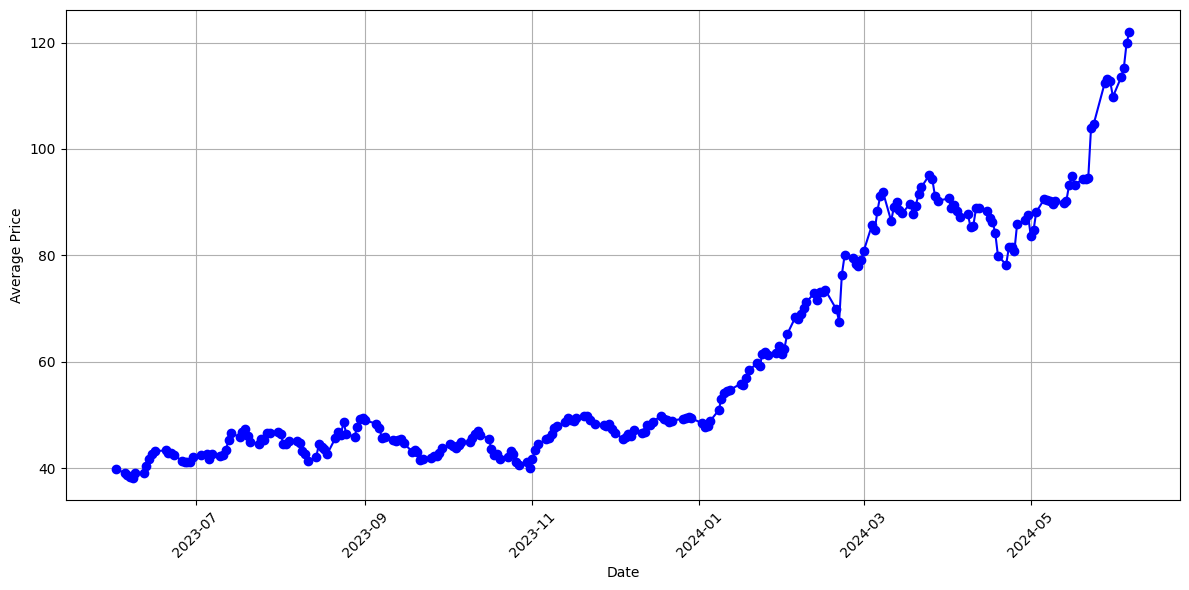

In [9]:
df['Average_Price'] = (df['High'] + df['Low']) / 2
plt.figure(figsize=(12, 6))
plt.plot(df['Only_Date'], df['Average_Price'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
data = df[['Date', 'Average_Price']].set_index('Date')
data = data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [11]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]


In [12]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []  # Initialize empty lists for inputs and outputs
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]  # Create an input sequence of length `look_back`
        X.append(a)  # Append the input sequence to X
        Y.append(dataset[i + look_back, 0])  # Append the corresponding output value to Y
    return np.array(X), np.array(Y)  # Convert lists to numpy arrays and return

In [13]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [14]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [15]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100

203/203 - 1s - loss: 0.0219 - 1s/epoch - 7ms/step
Epoch 2/100
203/203 - 0s - loss: 0.0091 - 208ms/epoch - 1ms/step
Epoch 3/100
203/203 - 0s - loss: 0.0026 - 208ms/epoch - 1ms/step
Epoch 4/100
203/203 - 0s - loss: 4.9463e-04 - 202ms/epoch - 997us/step
Epoch 5/100
203/203 - 0s - loss: 3.1683e-04 - 211ms/epoch - 1ms/step
Epoch 6/100
203/203 - 0s - loss: 3.0922e-04 - 215ms/epoch - 1ms/step
Epoch 7/100
203/203 - 0s - loss: 3.2699e-04 - 224ms/epoch - 1ms/step
Epoch 8/100
203/203 - 0s - loss: 3.2509e-04 - 220ms/epoch - 1ms/step
Epoch 9/100
203/203 - 0s - loss: 3.3505e-04 - 222ms/epoch - 1ms/step
Epoch 10/100
203/203 - 0s - loss: 3.2161e-04 - 219ms/epoch - 1ms/step
Epoch 11/100
203/203 - 0s - loss: 3.2136e-04 - 221ms/epoch - 1ms/step
Epoch 12/100
203/203 - 0s - loss: 3.1546e-04 - 217ms/epoch - 1ms/step
Epoch 13/100
203/203 - 0s - loss: 3.4427e-04 - 207ms/epoch - 1ms/step
Epoch 14/100
203/203 - 0s - loss: 3.4926e-04 - 218ms/epoch - 1ms/step
Epoch 15/100
203/203 - 0s - loss: 3.4725e

In [16]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 2ms/step


In [17]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [18]:
trainScore = np.sqrt(np.mean((trainPredict[:,0] - trainY[0])**2))
print(f'Train Score: {trainScore:.2f} RMSE')
testScore = np.sqrt(np.mean((testPredict[:,0] - testY[0])**2))
print(f'Test Score: {testScore:.2f} RMSE')


Train Score: 1.66 RMSE
Test Score: 3.31 RMSE


trainPredict shape: (203, 1)
testPredict shape: (50, 1)
scaled_data shape: (255, 1)


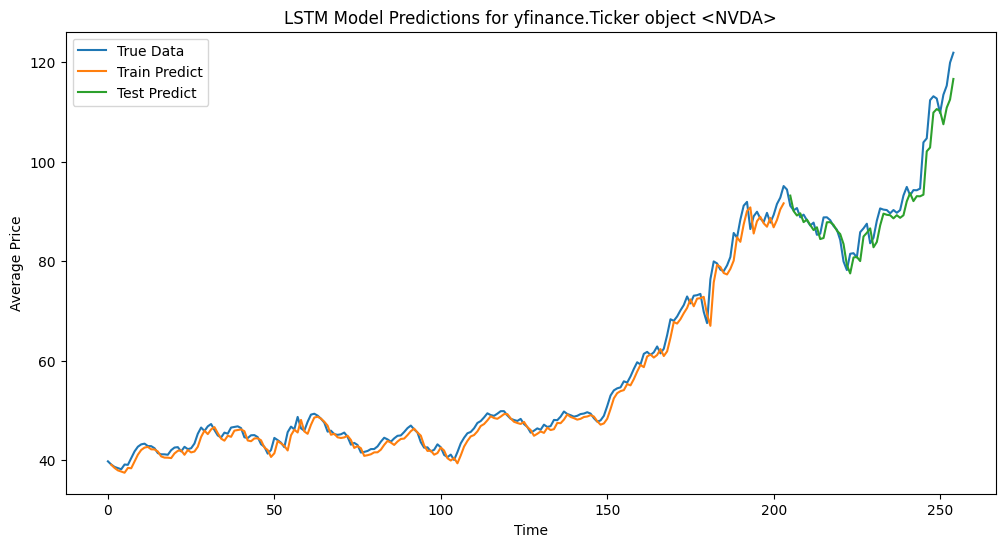

In [19]:
# Print shapes for debugging
print(f"trainPredict shape: {trainPredict.shape}")
print(f"testPredict shape: {testPredict.shape}")
print(f"scaled_data shape: {scaled_data.shape}")

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2):len(scaled_data), :] = testPredict

# Plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='True Data')
plt.plot(trainPredictPlot, label='Train Predict')
plt.plot(testPredictPlot, label='Test Predict')
plt.title(f'LSTM Model Predictions for {NVDA}')
plt.xlabel('Time')
plt.ylabel('Average Price')
plt.legend()
plt.show()